In [1]:
#getting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None 
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 100
pd.options.display.precision = 5




In [2]:
#stackoverflow 2019 data
survey_2019 = pd.read_csv('./survey_results_public_2019.csv')


In [3]:
survey_2019.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the company or organization;Specific department or te...,"Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the s

In [4]:
### missing check for columns, decision was to let all columns stay as is because they all have at most 24% missing
missing={}
for x in survey_2019:
    missing[x] = survey_2019[x].isna().sum()/len(survey_2019.index)
sorted(missing.items(), key=lambda x: x[1], reverse=True)

[('BlockchainOrg', 0.4579953421914202),
 ('CodeRevHrs', 0.4398253884319836),
 ('ConvertedComp', 0.3719496416637602),
 ('CompTotal', 0.37057705072961084),
 ('MiscTechWorkedWith', 0.3296130868670049),
 ('BlockchainIs', 0.3230989053024763),
 ('PurchaseHow', 0.3124894524262232),
 ('MgrMoney', 0.3119381659034911),
 ('MgrIdiot', 0.31191566441276736),
 ('MgrWant', 0.3110943600013501),
 ('PurchaseWhat', 0.3021275159479315),
 ('UnitTests', 0.2949382896616901),
 ('WebFrameDesireNextYear', 0.2918330839418111),
 ('CompFreq', 0.28818784244456197),
 ('WorkWeekHrs', 0.27429317192263986),
 ('MiscTechDesireNextYear', 0.2742031659597448),
 ('WebFrameWorkedWith', 0.268454035079824),
 ('LastInt', 0.24445619522293352),
 ('WorkChallenge', 0.2333629602961196),
 ('SOHowMuchTime', 0.230696533645354),
 ('WorkPlan', 0.2246661341313862),
 ('DatabaseDesireNextYear', 0.2220447104620681),
 ('SONewContent', 0.21739815262761158),
 ('WorkLoc', 0.21182903367348085),
 ('WorkRemote', 0.2092526129856103),
 ('CodeRev', 0.20

In [5]:
#above 25% empty columns are eliminated
for k,v in missing.items():
    if v > 0.30:
        print(k)
        survey_2019 = survey_2019.drop(k, axis=1)

MgrIdiot
MgrMoney
MgrWant
CompTotal
ConvertedComp
CodeRevHrs
PurchaseHow
PurchaseWhat
MiscTechWorkedWith
BlockchainOrg
BlockchainIs


In [6]:
#Business elimination
survey_2019 = survey_2019.drop(columns=
['EduOther', 
'LastInt',
'JobFactors',
'CurrencySymbol',
'CurrencyDesc',
'CompFreq',
'WorkChallenge',
'SOVisitTo',
'SONewContent',
'Gender',
'Trans',
'Sexuality',
'Ethnicity'], axis=1)

In [7]:
for i in survey_2019.columns:
    print(i)
    print(survey_2019[i].unique())

Respondent
[    1     2     3 ... 88802 88816 88863]
MainBranch
['I am a student who is learning to code'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am' nan]
Hobbyist
['Yes' 'No']
OpenSourcer
['Never' 'Less than once per year' 'Once a month or more often'
 'Less than once a month but more than once per year']
OpenSource
['The quality of OSS and closed source software is about the same'
 'OSS is, on average, of HIGHER quality than proprietary / closed source software'
 nan
 'OSS is, on average, of LOWER quality than proprietary / closed source software']
Employment
['Not employed, and not looking for work'
 'Not employed, but looking for work' 'Employed full-time'
 'Independent contractor, freelancer, or self-employed' nan
 'Employed part-time' 'Retired']
Country
['United Kingdom' 'Bosnia and Herzegovina' 'Thailand' 'United States'

['MacOS;Windows' 'Windows' nan ...
 'Android;Arduino;AWS;Docker;Google Cloud Platform;IBM Cloud or Watson;iOS;Kubernetes;Linux;MacOS'
 'AWS;IBM Cloud or Watson;Raspberry Pi;Slack;WordPress'
 'Android;Arduino;Docker;Heroku;Linux;WordPress']
PlatformDesireNextYear
['Android;Arduino;Windows' 'Windows' nan ...
 'Android;Arduino;Docker;iOS;Raspberry Pi;Slack'
 'Arduino;AWS;Docker;Microsoft Azure;Slack;Windows;WordPress;Other(s):'
 'Android;AWS;Google Cloud Platform;IBM Cloud or Watson;iOS;Linux;MacOS;Slack;Windows']
WebFrameWorkedWith
['Django;Flask' 'Django' nan ... 'Django;Drupal;Express;Ruby on Rails'
 'ASP.NET;Express;Spring;Vue.js'
 'Angular/Angular.js;Drupal;jQuery;Laravel;React.js;Ruby on Rails']
WebFrameDesireNextYear
['Flask;jQuery' 'Django' 'Other(s):' ... 'ASP.NET;Drupal;jQuery;Laravel'
 'Angular/Angular.js;ASP.NET;Django;Drupal;React.js;Ruby on Rails;Spring;Vue.js'
 'Angular/Angular.js;ASP.NET;Django;Express;jQuery;React.js;Ruby on Rails;Vue.js;Other(s):']
MiscTechDesireNextYear

In [8]:
#missing analysis
#missing rows, users that did not participate enough will be removed
survey_2019['missing_row_rate'] = (len(survey_2019.columns) - survey_2019.apply(lambda x: x.count(), axis=1))/len(survey_2019.columns)
survey_2019.sort_values(by=['missing_row_rate'], ascending = 0)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,WorkWeekHrs,WorkPlan,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Dependents,SurveyLength,SurveyEase,missing_row_rate
88595,42460,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88502,29513,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88389,12779,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88403,14848,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88847,83648,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88790,73472,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88789,73408,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88458,22994,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88666,52784,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082
88610,44453,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95082


In [9]:
print(survey_2019.groupby(['missing_row_rate']).size())

missing_row_rate
0.00000    13731
0.01639    15634
0.03279    12428
0.04918     8915
0.06557     6421
0.08197     4739
0.09836     3258
0.11475     2031
0.13115     1464
0.14754     1081
0.16393      702
0.18033      484
0.19672      999
0.21311     1713
0.22951     1677
0.24590     1739
0.26230     1576
0.27869     1663
0.29508     1657
0.31148     1356
0.32787     1146
0.34426      969
0.36066      779
0.37705      596
0.39344      445
0.40984      338
0.42623      235
0.44262      183
0.45902      124
0.47541       94
0.49180       68
0.50820       60
0.52459       46
0.54098       56
0.55738       34
0.57377       29
0.59016       32
0.60656       27
0.62295       24
0.63934       22
0.65574       26
0.67213       22
0.68852       15
0.70492       10
0.72131       13
0.73770        9
0.75410       16
0.77049       14
0.78689       11
0.80328        6
0.81967        7
0.83607       11
0.85246        4
0.86885        4
0.88525        7
0.91803       82
0.93443       41
0.95082       

In [10]:
#decision, continue with users answering at least 50%

survey_2019_user_elim = survey_2019.loc[survey_2019['missing_row_rate'] <= 0.5]
survey_2019_user_elim = survey_2019_user_elim.drop('missing_row_rate', axis=1)


In [11]:
survey_2019_user_elim.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,WorkWeekHrs,WorkPlan,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,14.0,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,"Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,Atom;PyCharm,Windows,I do not use containers,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,19.0,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",3,22,1,Slightly satisfied,Slightly satisfied,"I’m not actively looking, but I am open to new opportunities",1-2 years ago,No,I was preparing for a job search,40.0,There's no schedule or spec; I work on what seems most important or urgent,Less than once per month / Never,Home,Average,No,"No, but I think we should",HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,NaN,Vim;Visual Studio Code,Linux-based,I do not use containers,Yes,Yes,Yes,Reddit,In real life (in person),Username,2011,A few times per week,6-10 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a private Q&A instance",Neutral,Just as welcome now as I felt last year,28.0,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng

First question, does the age distribution change depending on country? First checking if age and country variables are ok

In [12]:
print(survey_2019_user_elim['Age'].isna().sum()/len(survey_2019_user_elim.index))
print(survey_2019_user_elim['Country'].isna().sum()/len(survey_2019_user_elim.index))


0.10298600487279733
0.0


No missing values for countries but missing values exist for age. Replacing missing with 0 to see which countries has the most missing ratio as well. Rounding down all ages. Distribtuion analysis will be done on top 5 countries

In [13]:
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].fillna(0)
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].astype('int32')

In [14]:
age_distr = pd.DataFrame()
age_distr['Age'] = range(99)
for x in survey_2019_user_elim['Country'].value_counts()[:5].reset_index(name='count')['index']:
    age_distr = age_distr.merge(survey_2019_user_elim[survey_2019_user_elim['Country']==x].groupby('Age').count()['Respondent'].reset_index(name=x), how='left', on='Age') 

In [15]:
age_distr = age_distr.fillna(0)
for x in age_distr.drop(['Age'], axis=1):
    age_distrage_distr[x]/sum(age_distr[x])

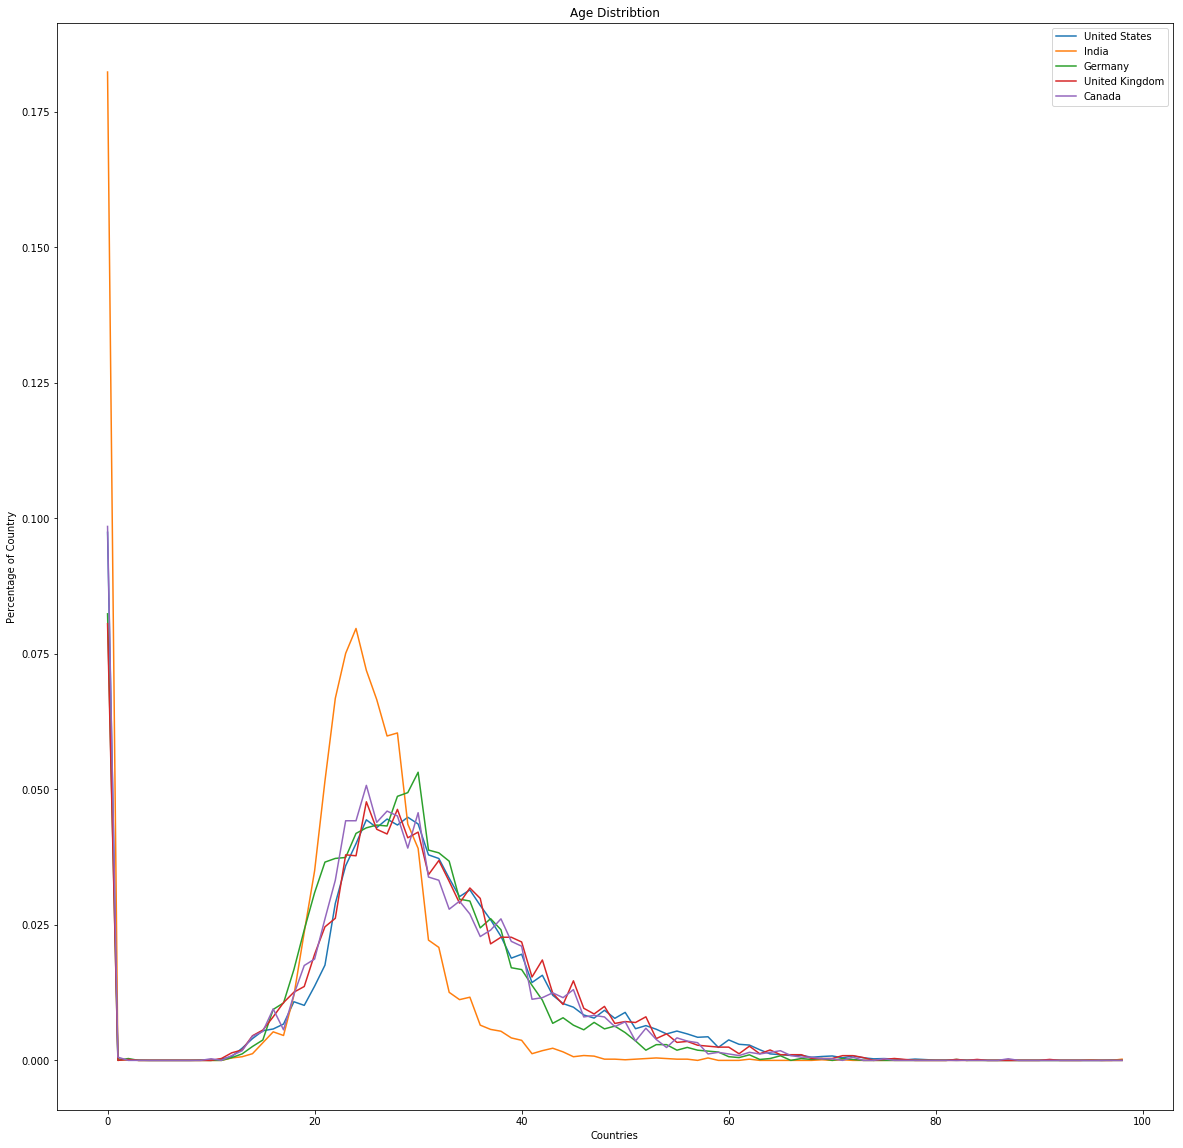

In [16]:
plt.figure(figsize=(20,20))
plt.plot(age_distr['United States'], label='United States')
plt.plot(age_distr['India'], label='India')
plt.plot(age_distr['Germany'], label='Germany')
plt.plot(age_distr['United Kingdom'], label='United Kingdom')
plt.plot(age_distr['Canada'], label='Canada')
 
# Add labels and title
plt.title("Age Distribtion")
plt.xlabel("Countries")
plt.ylabel("Percentage of Country")
plt.legend()

plt.savefig('country_age_distrs.png', bbox_inches='tight')
plt.show()

Next question is what variables are correlated with age? Ultimately, we will ask if age is predictable from other answers we gather but right now, its best to see if just any variable is enough correlated to guess age with.

In [18]:
corr_df = survey_2019_user_elim.copy()
for x in survey_2019_user_elim.select_dtypes(include='object'):
    corr_df[x] = survey_2019_user_elim[x].astype('category').cat.codes

In [21]:
corr_matrix = corr_df.corr(method='spearman')


In [81]:
corr_matrix['Age'].sort_values().reset_index(name='correlation')


,index,correlation
0,Student,-0.28818
1,SOVisit1st,-0.24470
2,YearsCode,-0.19490
3,MainBranch,-0.19147
4,Employment,-0.19083
5,BetterLife,-0.08364
6,EntTeams,-0.07298
7,Hobbyist,-0.06361
8,SocialMedia,-0.06288
9,OpenSourcer,-0.05695


TypeError: 'numpy.dtype' object is not callable